In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")


In [8]:
df=pd.read_csv('/content/Wholesale customers data.csv')

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
df.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [14]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [16]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [18]:
column=['Channel', 'Region']
for i in column:
    print(df[i].unique())

[2 1]
[3 1 2]


In [19]:
df_modified=pd.get_dummies(df, prefix=['C', 'R'], columns=['Channel', 'Region'])
df_modified=df_modified.drop(columns=['C_2','R_3'])

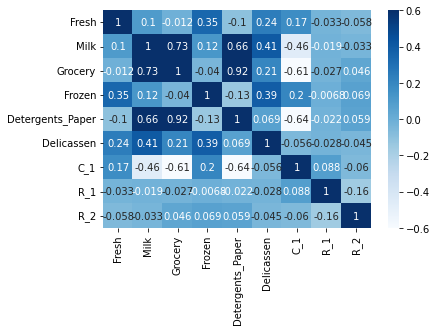

In [22]:
corrMatrix=df_modified.corr()
corrMatrix
plt.subplot()
sns.heatmap(corrMatrix,annot=True,cmap='Blues',vmax=0.6,vmin=-0.6)

In [23]:
df_modified=df_modified.drop(columns=['Grocery'])

In [24]:
sc=MinMaxScaler()
df_modified=sc.fit_transform(df_modified)
df_modified=pd.DataFrame(df_modified)

# **K-Means clustering**

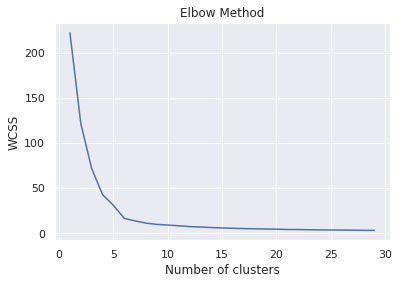

In [26]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=7)
    kmeans.fit(df_modified)
    wcss.append(kmeans.inertia_)
sns.set()    
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
model=KMeans(n_clusters=6,init='k-means++',random_state=9)
model.fit(df_modified)
pred=model.fit_predict(df_modified)
pd.DataFrame(pred).value_counts()

1    211
2    105
0     59
3     28
4     19
5     18
dtype: int64

In [28]:
def silhouette_Score(range_n_clusters,X,model):
    silhouette_coefficients=[]  
    for n_clusters in range_n_clusters:
        
        clusterer = model
        clusterer.set_params(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
        silhouette_coefficients.append(silhouette_avg)   
    sns.set()    
    plt.plot(range_n_clusters, silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()  

For n_clusters = 2 The average silhouette_score is : 0.5418842863256085
For n_clusters = 3 The average silhouette_score is : 0.6481920757272706
For n_clusters = 4 The average silhouette_score is : 0.7139900785836899
For n_clusters = 5 The average silhouette_score is : 0.7626967034630755
For n_clusters = 6 The average silhouette_score is : 0.8053783997392479
For n_clusters = 7 The average silhouette_score is : 0.7908341446855242
For n_clusters = 8 The average silhouette_score is : 0.6625036117240009
For n_clusters = 9 The average silhouette_score is : 0.6805761787214216
For n_clusters = 10 The average silhouette_score is : 0.6483334783190314
For n_clusters = 11 The average silhouette_score is : 0.6177977663916546


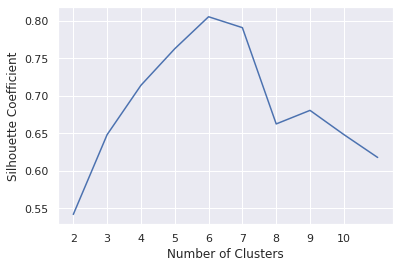

In [30]:
range_n_clusters = list(range(2,12))
silhouette_Score(range_n_clusters,df_modified,KMeans())

In [31]:
ac = AgglomerativeClustering(n_clusters = 6)
ac.fit(df_modified)
pred = ac.fit_predict(df_modified)

In [32]:
import scipy.cluster.hierarchy as shc

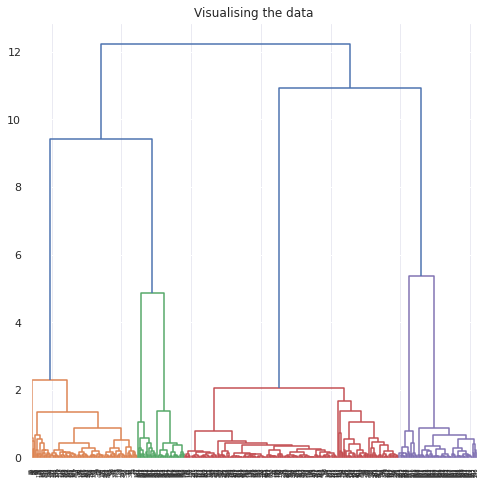

In [33]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_modified, method ='ward')))